### Hello All!!!

Given my Marketing background I thought it would be fun to see how I can combined what data science skills I have learned with my marketing knowledge in somewhat of a 'Market Research' problem.

Iowa has a Liquor problem!  Not the 'AA' type, but that there are not enough stores to handle the statewide alcohol demand.  Using the statewide sales data from 2016 and some of 2016 I'm going to identify some ideal county locations for opening some new stores.  

In [1]:
#Necessary imports
import pandas as pd

# Load Dataset
df = pd.read_csv('Data/Iowa_Liquor_Sales_reduced.csv')
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# lowercase 'y' indicates a 2 digit year, i.e '95'.
# uppercase 'Y' indicates a 4 digit year , i.e '1995'

/Users/samuelstack/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Checking What features are in this data and what the way the data is entered.
df.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77


In [3]:
# We're going to remove all rows from 2016 and focus on using the 2015 data which we have a whole years worth.  
df2015 = df[(df['Date'] < '2016-01-01')]

In [6]:
df2015.shape
# This is a pretty large dataset 

(2184483, 18)

In [7]:
df2015.describe()
# As we can see, lots of alcohol has been sold in Iowa in 2015.  

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,2.184483e+06,2.183364e+06,2.183710e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06,2.184483e+06
mean,3.578517e+03,5.719683e+01,1.044253e+06,2.559387e+02,4.596141e+04,9.248151e+02,9.875308e+00,8.980478e+00,2.372598e+00
std,9.435823e+02,2.729248e+01,5.254551e+04,1.409934e+02,5.263435e+04,5.211457e+02,2.369368e+01,2.834942e+01,7.489113e+00
min,2.106000e+03,1.000000e+00,1.011100e+06,1.000000e+01,1.730000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.603000e+03,3.100000e+01,1.012200e+06,1.150000e+02,2.682800e+04,7.500000e+02,2.000000e+00,1.500000e+00,4.000000e-01
50%,3.713000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817600e+04,7.500000e+02,6.000000e+00,5.250000e+00,1.390000e+00
75%,4.357000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.460100e+04,1.000000e+03,1.200000e+01,1.050000e+01,2.770000e+00
max,9.023000e+03,9.900000e+01,1.701100e+06,9.780000e+02,9.992750e+05,1.800000e+05,3.960000e+03,3.960000e+03,1.046120e+03


There a few unreasonable sales figures( $100,000+) in the dataset.  It is unreasonable to assume that these are normal sales figures and in the end will significantly skew our data.  If a store records a 100,000 sale it is going to drastically inflate that stores sales as well as increase the average sale statistics which I engineer and use later on.

In [12]:
# removing all records where bottles sold is greater than 50.
df2015 = df2015[df2015['Bottles Sold'] < 50]

# this dropped 4863 rows which is about 1.8% of the rows in the dataset.
# We can come back to that and see if there are any trends regarding these large transactions.

### Exploratory Analysis

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# strip that Dollar sign 
df2015['Sale (Dollars)'] = df2015['Sale (Dollars)'].map(lambda x: x.lstrip('$'))

# convert money to a float
df2015[['Sale (Dollars)']] = df2015[['Sale (Dollars)']].apply(pd.to_numeric)

# Convert store number and county number to a string(Object) as well.  
df2015[['Store Number']] = df2015[['Store Number']].astype(str)
df2015[['County Number']] = df2015[['County Number']].astype(str)

In [24]:
# calculate the total sales of liquor grouped by month.
times = pd.DatetimeIndex(df2015['Date'])
month_ts = df2015.groupby([times.month])['Sale (Dollars)'].sum()

# adding a month column for graphing
month_n = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

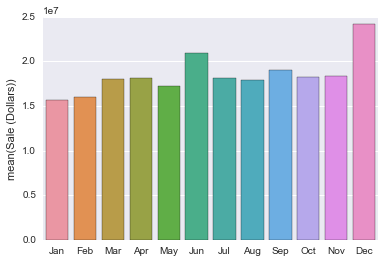

In [26]:
sns.barplot(month_n,month_ts)

looks like Iowans are un-creative gift givers and just give eachother alcohol for christmas/hanukkah.
Or they need alcohol to stand the cold/ family gatherings.

In [27]:
# Examine top county total sales.
county_ts = pd.DataFrame(df2015.groupby('County', axis=0)['Sale (Dollars)'].sum())

county_ts = county_ts.sort('Sale (Dollars)', ascending=False)
county_ts.head()

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Sale (Dollars)
County,
Polk,4.349278e+07
Linn,1.888935e+07
Scott,1.486903e+07
Johnson,1.301324e+07
Black Hawk,1.242950e+07


In [28]:
county_bs = pd.DataFrame(df2015.groupby('County', axis =0)['Bottles Sold'].sum())
county_bs = county_bs.sort('Bottles Sold', ascending = False)
county_bs.head()

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Bottles Sold
County,
Polk,3395680
Linn,1531685
Scott,1269078
Black Hawk,1113632
Johnson,951045


In [ ]:
# Creating a avg sale_per_bottle feature based on County Sales dollars and bottles sold
countys = county_ts.join(county_bs)
countys['sale_per_bottle'] =  countys['Sale (Dollars)']/ countys['Bottles Sold']
countys = countys.sort('Bottles Sold', ascending = False)
countys.head()


### Adding additional resources.  

 It does not make much sense to try to make a model to predict good store locations if most of the features we have are already related (Sale amount, bottles sold, liters sold etc.) and we don't really know what are some examples to stores that have opened up to know what are some of the feature criteria associated with a new store that will perform well.
 
 Instead, I decided to gather some information on population to add into our data so we can look at some county wide specifics and analyze those counties where higher ratios of purchase (ammounts & bottles) per person.  Higher per person ratios is evidence of locations where there is higher demand for alcohol and thus warrents investigation as to whether said county has an undersaturation of stores.

I used the information available on the below website to get my information. 

http://www.iowa-demographics.com/counties_by_population

In [ ]:
#Read Population csv in as pop df
pops = pd.read_csv('Data/IowaPopulations.csv')

#Drops the column "nums" which is not needed
pops.drop('num', axis =1, inplace = True)

#drops the rows with index 99-140 which are completely blank and should not have made it to python anyways.
pops.drop(pops.index[range(99,140)], inplace = True)

#Sorts the dataframe alphabetically
pops.sort('County',inplace=True)


#Suppose to strip out the " County" post fix from the county collumns
pops['County'] = pops['County'].map(lambda x: x.rstrip('County'))

#this left all the countys with a space after the actual county,need to strip the space(last thing i figured out)
pops['County'] = pops['County'].map(lambda x :x.rstrip(' '))


In [ ]:
# resetting index of counties to merge better
countys.reset_index(inplace = True)

In [60]:
# Making sure target dataframes have same number of rows/counties
pops.shape

(99, 2)

In [61]:
countys.shape

(99, 4)

In [ ]:
# Merge Dataframes county and population dataframes
countyps = pd.merge(countys, pops, on= 'County', how='outer')


In [ ]:
# Creating a feature for number of stores in each county.  
county_stores = pd.DataFrame(df2015.groupby('County', axis = 0)['Store Number'].nunique())
county_stores.rename(columns = {'Store Number': 'store_count'}, inplace = True)
county_stores.reset_index(inplace=True)

# merging results of stores per county with the mane dataframe
countyps = pd.merge(countyps, county_stores, on='County', how='outer')


In [76]:
countyps.dtypes

County              object
Sale (Dollars)     float64
Bottles Sold       float64
sale_per_bottle    float64
Population          object
store_count_y      float64
dtype: object

#### Some Insights so far.
Polk neary outsells the second place county Linn by nearly double (2.5m).
Top 5 all post sales above 1m.  this could be attributed to population density of those reasons. 
Polk countains Des Moines,
Linn county contains Cedar Rapids,
Scott County has another City, Davenport,
Johnson County contains Iowa City,
Black hawk has some notable cities.  Waterloo and Cedar Falls

In [91]:
# Which county has the best average sales?.

acs = pd.DataFrame(df2015.groupby('County')['Sale (Dollars)'].mean())
acs.sort('Sale (Dollars)', inplace=True,ascending = False )
acs.head()

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Sale (Dollars)
County,
Delaware,134.729618
Fremont,134.243296
Floyd,128.625712
Hardin,125.021772
Johnson,122.122429


#### Insights 
Delaware doesnt seem like they have any population centers of note, nor does Floyd or Hardin.


In [92]:

#I dont think this is right, unless sales of liquor to stores and restaurants must flow through the state.

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Volume Sold (Liters)
County,
Delaware,9.809827
Hardin,9.696966
Fremont,9.613966
Floyd,9.372983
Hancock,9.087602
Mills,8.623744
Winneshiek,8.618957
Howard,8.533412
Wright,8.364783


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1243ae210>]], dtype=object)

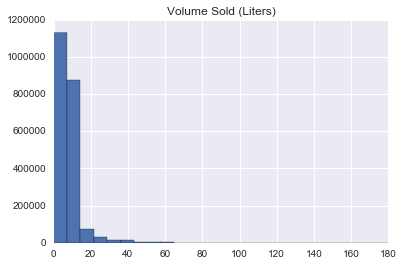

In [93]:
# Just want to check the Volume sold per transaction real quick. 
df2015.hist('Volume Sold (Liters)', bins = 25)
# Everything seems to be in place with respect to a few large outlier,  

Most sales fall between one and 10 liters.  

### Exporting refined dataframe to a csv to be analyzed uwing Tableau

In [ ]:
countyps.to_csv('iowa_tableau.csv')

# Analyze the data and Insights
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

I can use th newly constructed countyps dataframe to do some county wide analytics and find optimal locations.  
It woudl be helpful to somehow, in the end, incorporate cost of living.  



###  - Per Bottle Sales  by county - this will show what the average price people are willing to pay per bottle in each county
        this could indicate...
            1. The cost of living is higher in these counties driving up average costs of goods.
            2. The audience has a tendency to by better quality alcohols and are willing to pay premiums. 

In [99]:
bottle_cms = (df2015.groupby('County', axis=0)['Volume Sold (Liters)'].mean())
bottle_cms = pd.DataFrame(bottle_cms)
bottle_cms = bottle_cms.sort('Volume Sold (Liters)', ascending = False)
bottle_cms.head()

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Volume Sold (Liters)
County,
Delaware,9.809827
Hardin,9.696966
Fremont,9.613966
Floyd,9.372983
Hancock,9.087602


###  - Total Sale per County - 

In [103]:
countyps[['County','Sale (Dollars)']].head()

,County,Sale (Dollars)
0,Polk,4.349278e+07
1,Linn,1.888935e+07
2,Scott,1.486903e+07
3,Black Hawk,1.242950e+07
4,Johnson,1.301324e+07


### Total sales per store vs. Average Individual annual spending.

![Total sales per store vs. Average Individual annual spending](Images/Iowa1.png)


#### Final Analysis and Insights

I made the 'Sales per Store' and 'Sales per Person' using calculate fields in Tableau, but could have just as easily made those as columns in Python.  

The nice thing about Tableau was the scroll over ability, which I used to determine that the one point in the top right was Dickinson County.

Therefore, my recomendation for a county to open a new store would be Dickinson, as they have one of the best 'Per Store Sales' and a per capita spending that greatly surpases everyone else. 

#### Calculations behind the Features in the above Plot

'Sales per Store' =  countyps['Sale (Dollars)']/countyps['store_count_y']

'Sales per Person' = countyps['Sale (Dollars)']/ countyps['Population']

In [104]:
countyps.head()

,County,Sale (Dollars),Bottles Sold,sale_per_bottle,Population,store_count_y
0,Polk,4.349278e+07,3395680.0,12.808268,"467,711",206.0
1,Linn,1.888935e+07,1531685.0,12.332397,"219,916",101.0
2,Scott,1.486903e+07,1269078.0,11.716400,"172,126",65.0
3,Black Hawk,1.242950e+07,1113632.0,11.161225,"133,455",72.0
4,Johnson,1.301324e+07,951045.0,13.683100,"144,251",53.0
